In [29]:
from google_play_scraper import app, reviews_all
import pandas as pd

In [30]:
app_id = 'com.facebook.katana'

In [31]:
# Mendapatkan informasi aplikasi
app_info = app(app_id)
print("App Info:", app_info)

App Info: {'title': 'Facebook', 'description': "Where real people propel your curiosity. Whether you’re thrifting gear, showing a reel to that group who gets it, or sharing laughs over fun images reimagined by AI, Facebook helps you make things happen like no other social network.\r\n\r\nExplore and expand your interests: \r\n* Ask Meta AI to search topics that matter to you, and get instant results more interactive than just text\r\n* Shop Marketplace for deals and hidden gems to nurture your hobbies\r\n* Personalize your Feed to see more of what you like, less of what you don’t\r\n* Dive into reels and videos for how-to’s or quick entertainment\r\n\r\nConnect with people and communities:\r\n* Join groups to learn tips from real people who’ve been there, done that\r\n* Turn on sharing to Instagram to save time\r\n* Privately message relatable posts that only your BFF will get or that Reels trend everyone’s talking about\r\n\r\nShare your world:\r\n* Use generative AI to delight friend

In [32]:
# Mendapatkan semua review
reviews = reviews_all(
    app_id,
    sleep_milliseconds=0,  # Menunggu beberapa waktu di antara permintaan untuk menghindari diblokir
    lang='id',  # Bahasa Indonesia
    country='id'  # Negara Indonesia
)

In [33]:
# Konversi review ke dalam DataFrame
reviews_df = pd.DataFrame(reviews)
reviews_df.to_csv('playstore_reviews.csv', index=False)

In [34]:
facebookReviews  = pd.read_csv('playstore_reviews.csv')

In [35]:
facebookReviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,62d03ac8-3292-4673-9e92-23052e820df3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Facebook tuh klo mode gratis gk bisa lama digu...,1,0,436.0.0.35.101,2024-08-06 21:31:11,NaN,NaN,436.0.0.35.101
1,8c4b1396-aeb6-4251-b3b8-524d6decfc29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keren,5,0,NaN,2024-08-06 21:29:59,NaN,NaN,NaN
2,433768f1-4325-4077-82b0-e7f111286250,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,475.1.0.46.82,2024-08-06 21:29:21,NaN,NaN,475.1.0.46.82
3,103280b4-cf1f-448f-9d1d-c3c00511397f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,4,0,NaN,2024-08-06 21:27:31,NaN,NaN,NaN
4,2c8c9cb4-d674-4a56-b322-02f4b411f344,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍👍👍👍,5,0,NaN,2024-08-06 21:27:17,NaN,NaN,NaN


In [36]:
facebook = facebookReviews[['content', 'score']]

In [37]:
facebook.head()

,content,score
0,Facebook tuh klo mode gratis gk bisa lama digu...,1
1,Keren,5
2,oke,5
3,Mantap,4
4,👍👍👍👍,5


In [38]:
facebook.shape

(598500, 2)

In [39]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598500 entries, 0 to 598499
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  598494 non-null  object
 1   score    598500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


In [40]:
facebook.isnull().sum()

content    6
score      0
dtype: int64

In [41]:
facebook = facebook.dropna()

In [42]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase the text
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('indonesian')) 
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [44]:
#melakukan perubahan dan menambahkan kolom baru pada kolom yang berhasil di bersihkan
facebook['contents'] = facebook['content'].apply(preprocess_text)

In [45]:
facebook.sample(11)

,content,score,contents
548000,edo,5,edo
210548,👍,5,👍
568769,harus lebih berkeprimanusiaan...,1,berkeprimanusiaan
22058,"Makin lama makin gokil aja nih aplikasi, makin...",5,gokil aja nih aplikasi luas jangkauan perteman...
27485,Facebook mantap👍🏼,5,facebook mantap👍🏼
529037,Asik,2,asik
410457,Saya kasi bintang satu dulu,1,kasi bintang
263360,bgus,5,bgus
368571,Bagus,3,bagus
202819,Too bad for my account. It maybe safe. But it'...,1,too bad for my account it maybe safe but it to...


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_21220\3152927536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=facebook, palette='mako')


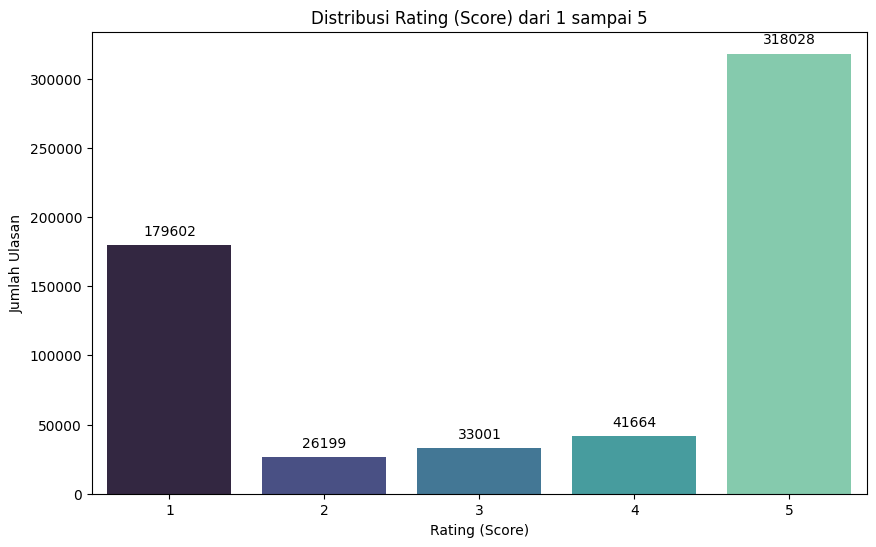

In [47]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='score', data=facebook, palette='mako')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribusi Rating (Score) dari 1 sampai 5')
plt.xlabel('Rating (Score)')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [48]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(facebook['contents'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    10   30  a2f  abis  account   ad  adil  admin   ah   aj  ...  yah  yahudi  \
0  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
1  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
2  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
3  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
4  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   

   yes   yg  yng  you  your  youtube  zionis  zuckerberg  
0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
1  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
2  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
3  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
4  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  

[5 rows x 1000 columns]
